In [5]:
#data wrangling and manipulation
import numpy as np
import pandas as pd
import random as rnd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

#ml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [6]:
train_df = pd.read_csv('sample_data/train.csv')
test_df = pd.read_csv('sample_data/test.csv')
train_df['Type']='train'
test_df['Type']='test'
all_df = pd.concat([train_df,test_df],axis=0,ignore_index=True)
all_df.info()
combine=[train_df,test_df]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Type         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [7]:
all_df.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
#Since we have age and embarked which is null we will fill it using median
all_df['Age'].fillna(all_df['Age'].median(), inplace=True)
all_df['Embarked'].fillna(all_df['Age'].mode()[0], inplace=True)

In [9]:
# since we filled all the na values from our over all data set we can now start to wrangle the data
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Type         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [10]:
all_df['Title']=all_df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
all_df['Title'] = all_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
all_df['Title'] = all_df['Title'].replace('Mlle', 'Miss')
all_df['Title'] = all_df['Title'].replace('Ms', 'Miss')
all_df['Title'] = all_df['Title'].replace('Mme', 'Mrs')
all_df['FamilySize'] = all_df['SibSp']+all_df['Parch']+1
all_df['IsAlone']=1
all_df['IsAlone'].loc[all_df['FamilySize']>1]=0
all_df.drop('FamilySize', axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type,Title,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,test,Mr,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test,Rare,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test,Mr,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,test,Mr,1


In [11]:
all_df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1, inplace=True)


In [12]:
all_df['Fare'].fillna(all_df['Fare'].median(), inplace=True)

In [13]:
all_df1= all_df.copy()

In [14]:
all_df1.dtypes,all_df1.isna().sum()

(Survived      float64
 Pclass          int64
 Sex            object
 Age           float64
 SibSp           int64
 Parch           int64
 Fare          float64
 Embarked       object
 Type           object
 Title          object
 FamilySize      int64
 IsAlone         int64
 dtype: object, Survived      418
 Pclass          0
 Sex             0
 Age             0
 SibSp           0
 Parch           0
 Fare            0
 Embarked        0
 Type            0
 Title           0
 FamilySize      0
 IsAlone         0
 dtype: int64)

In [15]:
for label, content in all_df1.items():
  if not pd.api.types.is_numeric_dtype(content):
    all_df1[label]=pd.Categorical(content).codes+1

In [16]:
all_df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Type,Title,FamilySize,IsAlone
0,0.0,3,2,22.0,1,0,7.2500,4,2,3,2,0
1,1.0,1,1,38.0,1,0,71.2833,2,2,4,2,0
2,1.0,3,1,26.0,0,0,7.9250,4,2,2,1,1
3,1.0,1,1,35.0,1,0,53.1000,4,2,4,2,0
4,0.0,3,2,35.0,0,0,8.0500,4,2,3,1,1


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier


In [18]:
all_df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Type,Title,FamilySize,IsAlone
0,0.0,3,2,22.0,1,0,7.2500,4,2,3,2,0
1,1.0,1,1,38.0,1,0,71.2833,2,2,4,2,0
2,1.0,3,1,26.0,0,0,7.9250,4,2,2,1,1
3,1.0,1,1,35.0,1,0,53.1000,4,2,4,2,0
4,0.0,3,2,35.0,0,0,8.0500,4,2,3,1,1


In [19]:
train = all_df1[all_df1['Type']==2].drop('Type', axis=1)
test = all_df1[all_df1['Type']==1].drop(['Type', 'Survived'], axis=1)

In [79]:
len(train) == len(X_train)+ len(X_test)


True

In [20]:
yvar = train.pop("Survived")
X_train,X_test, y_train, y_test = train_test_split(train, yvar, test_size=0.2)

In [24]:
# def evaluate(y_train,y_preds, y_test, y_test_preds):
  


In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_preds = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log, y_preds

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(82.72,
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 0.]))

In [56]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "LinearSVC":LinearSVC(),
          "GaussianNB":GaussianNB(),
          "Perceptron":Perceptron(),
          "SGDClassifier":SGDClassifier(),
          "Decision Tree":DecisionTreeClassifier(),
          "Gradient Boosting Classifier":GradientBoostingClassifier()}
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [57]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'Decision Tree': 0.7541899441340782,
 'GaussianNB': 0.7597765363128491,
 'Gradient Boosting Classifier': 0.7597765363128491,
 'KNN': 0.6759776536312849,
 'LinearSVC': 0.7318435754189944,
 'Logistic Regression': 0.7318435754189944,
 'Perceptron': 0.5754189944134078,
 'Random Forest': 0.7988826815642458,
 'SGDClassifier': 0.4245810055865922}

In [58]:
model_comp =  pd.DataFrame(list(model_scores.items()), columns=['model','accuracy']).sort_values('accuracy',ascending=False)

In [59]:
model_comp

,model,accuracy
2,Random Forest,0.798883
4,GaussianNB,0.759777
8,Gradient Boosting Classifier,0.759777
7,Decision Tree,0.754190
0,Logistic Regression,0.731844
3,LinearSVC,0.731844
1,KNN,0.675978
5,Perceptron,0.575419
6,SGDClassifier,0.424581


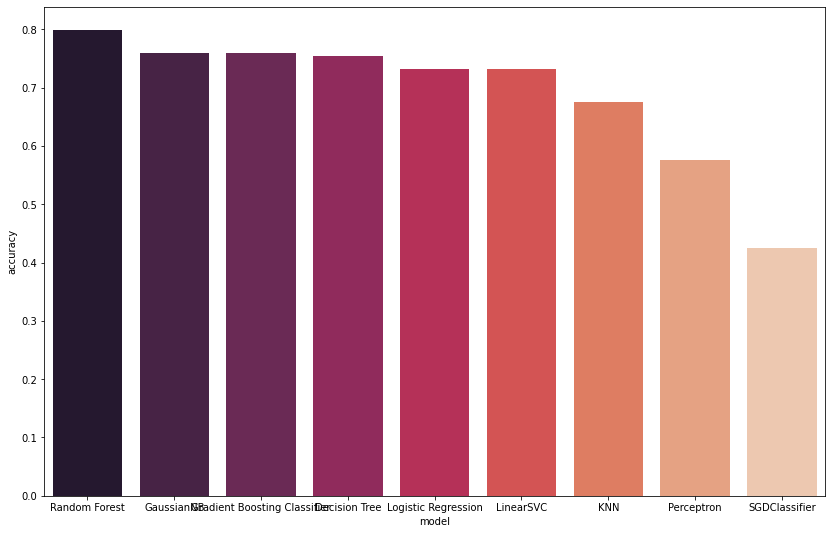

In [60]:
plt.figure(figsize=(14,9))
sns.barplot(x="model", y="accuracy", data=model_comp, palette="rocket")

## Hyper parameter Tuning
 We will tune the hyper parameter for our top 4 models
 Random FOrest,GaussianNB, Decision Tree and Logistic Regression

 ### Using GridSearchCV for it

 It took a lot of time so i just used some of the hyperparameter I used to train other model

In [105]:
rfc_best_hp = RandomForestClassifier(max_depth = 15, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)
rfc_best_hp.fit(X_train,y_train)
print(f"RandomForestClassifier accuracy on test is: {rfc_best_hp.score(X_test,y_test)*100:.2f}%")


gnb_best_hp  = GaussianNB(priors=None, var_smoothing=1e-07)
gnb_best_hp.fit(X_train,y_train)
print(f"Gaussian Naive bayes accuracy on test is: {gnb_best_hp.score(X_test,y_test)*100:.2f}%")


gb_best_hp = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)
gb_best_hp.fit(X_train,y_train)
print(f"Gradient Boosting accuracy on test is: {gb_best_hp.score(X_test,y_test)*100:.2f}%")
rfc = RandomForestClassifier(max_depth = 15, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)
gnb =  GaussianNB(priors=None, var_smoothing=1e-07)
gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)

RandomForestClassifier accuracy on test is: 80.45%
Gaussian Naive bayes accuracy on test is: 75.98%
Gradient Boosting accuracy on test is: 81.01%


In [158]:
## After tuning making a sample sumbission
y_test_preds = gb_best_hp.predict(test)
pred = pd.DataFrame(y_test_preds, columns=['Survived']).astype('int64')
outputdf = pd.concat([test_df['PassengerId'], pred], axis=1)
outputdf.to_csv('sample_data/submission_kaggle.csv', index=False)
len(y_test_preds)

418

## Evaluation on other classifier beyond accuracy

This step is after hyper parameter tuning 


In [89]:
y_preds_rfc = rfc_best_hp.predict(X_test)
y_preds_gnb = gnb_best_hp.predict(X_test)
y_preds_gb = gb_best_hp.predict(X_test)

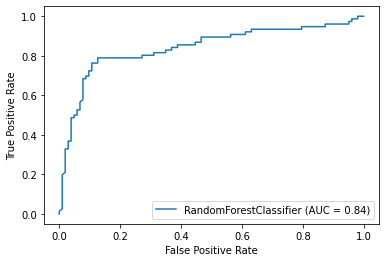

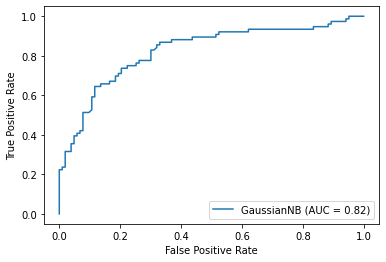

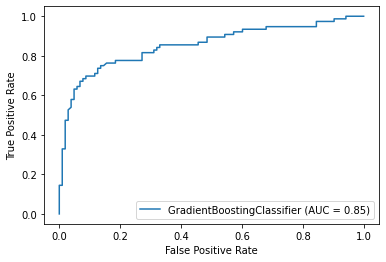

In [90]:
### ROC Curve for each evaluated classifier model
plot_roc_curve(rfc_best_hp,X_test,y_test)
plot_roc_curve(gnb_best_hp, X_test,y_test)
plot_roc_curve(gb_best_hp, X_test,y_test)

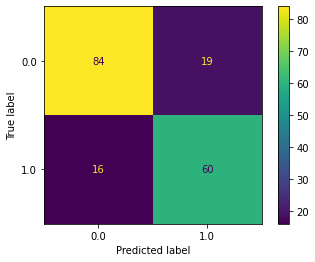

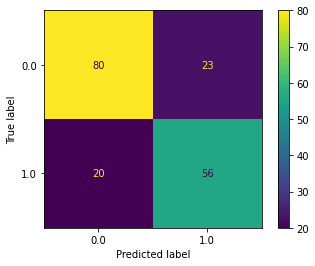

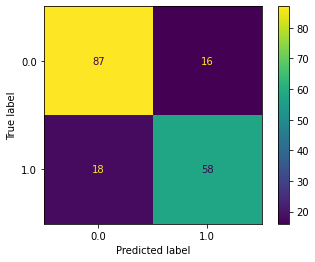

In [96]:
plot_confusion_matrix(rfc_best_hp, X_test, y_test)
plot_confusion_matrix(gnb_best_hp, X_test, y_test)
plot_confusion_matrix(gb_best_hp, X_test, y_test)


In [100]:
print(f"Classification Report for Random Forest\n{classification_report(y_test,y_preds_rfc)}")
print(f"Classification Report for GaussianNB \n{classification_report(y_test,y_preds_gnb)}")
print(f"Classification Report for Gradient Boosting \n{classification_report(y_test,y_preds_gb)}")

Classification Report for Random Forest
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       103
         1.0       0.76      0.79      0.77        76

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179

Classification Report for GaussianNB 
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       103
         1.0       0.71      0.74      0.72        76

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.76      0.76      0.76       179

Classification Report for Gradient Boosting 
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       103
         1.0       0.78      0.76      0.77        76

    accuracy                           0.81       179
   ma

In [106]:
models =[rfc, gnb, gb]

In [113]:
from sklearn.model_selection import cross_val_score

def cv_for_all(model):
  for item in model:
    print('Metrics score for:',item)
    cv_acc = cross_val_score(item,
                         train,
                         yvar,
                         cv=5,
                         scoring="accuracy")
    cv_acc = np.mean(cv_acc)
    print(f'Accuracy: {cv_acc*100:.2f}%')
    cv_precision = cross_val_score(item,
                         train,
                         yvar,
                         cv=5,
                         scoring="precision")
    cv_precision=np.mean(cv_precision)
    print(f'Precision: {cv_precision*100:.2f}%')
    cv_recall = cross_val_score(item,
                        train,
                         yvar,
                         cv=5,
                         scoring="recall")
    cv_recall = np.mean(cv_recall)
    print(f'Recall: {cv_recall}')
    cv_f1 = cross_val_score(item,
                         train,
                         yvar,
                         cv=5,
                         scoring="f1")
    cv_f1 = np.mean(cv_f1)
    print(f'F1 Score: {cv_f1}\n\n')
cv_for_all(model=models)


Metrics score for: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 81.26%
Precision: 77.27%
Recall: 0.7365728900255755
F1 Score: 0.742056775549285


Metrics score for: GaussianNB(priors=None, var_smoothing=1e-07)
Accuracy: 80.14%
Precision: 72.50%
Recall: 0.7806052855924979
F1 Score: 0.7511624219324441


Metrics score for: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
            

array([0.075847  , 0.2184949 , 0.20779351, 0.03173324, 0.02230431,
       0.23099157, 0.0272597 , 0.12306566, 0.05201041, 0.01049969])

In [138]:
def plot_feature(column, imp):
  df = (pd.DataFrame({'Features':column, 'Feature_Importance':imp}).sort_values("Feature_Importance", ascending=False).reset_index(drop=True))

  fig, ax =  plt.subplots()
  ax.barh(df.Features, df.Feature_Importance)
  ax.invert_yaxis()

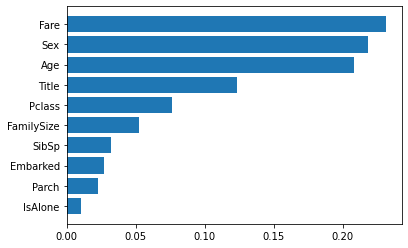

In [139]:
importance = rfc_best_hp.feature_importances_
plot_feature(X_train.columns,importance)

{'importances': array([[ 0.00558659,  0.        , -0.01117318, -0.00558659, -0.02234637],
        [ 0.15083799,  0.08938547,  0.17877095,  0.10055866,  0.20111732],
        [ 0.        ,  0.01117318,  0.00558659,  0.01117318,  0.        ],
        [ 0.01675978,  0.        ,  0.00558659,  0.02234637,  0.02234637],
        [ 0.        ,  0.        ,  0.        ,  0.01117318,  0.        ],
        [-0.00558659,  0.02793296,  0.        , -0.01675978, -0.00558659],
        [ 0.        , -0.01117318,  0.        ,  0.00558659, -0.01675978],
        [ 0.06145251,  0.06703911,  0.07821229,  0.05027933,  0.06703911],
        [-0.00558659,  0.        ,  0.        ,  0.02234637,  0.00558659],
        [ 0.00558659,  0.00558659,  0.01117318,  0.00558659,  0.00558659]]),
 'importances_mean': array([-6.70391061e-03,  1.44134078e-01,  5.58659218e-03,  1.34078212e-02,
         2.23463687e-03, -2.22044605e-17, -4.46927374e-03,  6.48044693e-02,
         4.46927374e-03,  6.70391061e-03]),
 'importances_std

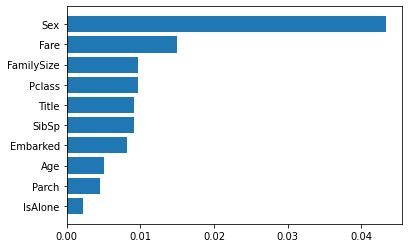

In [154]:
from sklearn.inspection import permutation_importance
importance = permutation_importance(gnb_best_hp
                                    , X_test, y_test)
imps = importance.importances_std
plot_feature(X_train.columns, imps)
importance

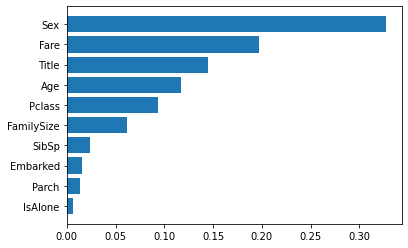

In [152]:
imps = gb_best_hp.feature_importances_
plot_feature(X_train.columns,imps)